## Text classification on LeMonde2003 Dataset

In this notebook, we 
apply classification algorithms to newspaper articles published in 2003 in *Le Monde*. 

The data are here : https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz

Download it into the data directory : 

```
wget https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz
```

Or you can download the file directly from the URL in pandas with `pd.read_csv(url)`.`

These articles concern different subjects but we will consider only articles related to the following subjects : entreprises (ENT), international (INT), arts (ART), société (SOC), France (FRA), sports (SPO), livres (LIV), télévision (TEL) and the font page articles (UNE).


> * Load the CSV file `LeMonde2003_9classes.csv.gz` containing the articles using pandas [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). How many articles do you have ? 
> * Plot the frequency histogram of the categories using seaborn [countplot](https://seaborn.pydata.org/tutorial/categorical.html) : `sns.countplot(data=df,y='category')`
> * Display the text of some of the article with the corresponding class using pandas [sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)
> * Using the [WordCloud library](https://amueller.github.io/word_cloud/index.html), display a word cloud for the most frequent classes. You can remove the stop words using the `stopwords` option, using the list of stop words in French in `data/stop_word_fr.txt` or from the URL https://cloud.teklia.com/index.php/s/3mwZfSre4PmJcdb/download/stop_word_fr.txt



In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

data = pd.read_csv("LeMonde2003_9classes.csv")

<Axes: xlabel='count', ylabel='category'>

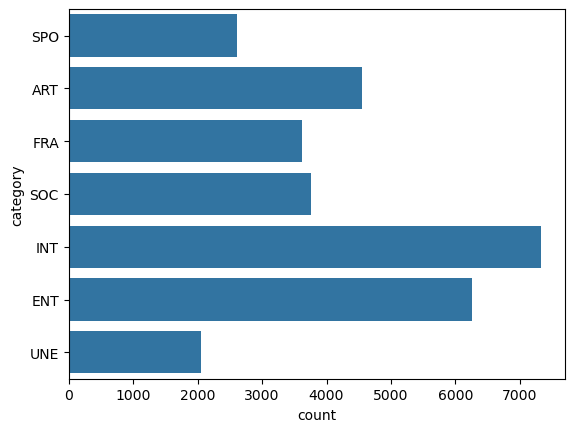

In [3]:
import seaborn as sns
%matplotlib inline

# Plot the statistics of category
# YOUR CODE HERE

sns.countplot(data=data,y='category')

In [4]:
# Print examples of the articles
pd.set_option('display.max_colwidth', None)
# YOUR CODE HERE

data.sample(n=3)

text  \
28428  la convocation n'est pas écrite mais elle est officielle le secrétaire d'etat aux programmes immobiliers de la justice pierre bédier devra se rendre dans la deuxième quinzaine du mois de janvier au pôle financier du tribunal de paris pour répondre aux questions du juge d'instruction philippe courroye soupçonné d'avoir perçu des fonds en argent liquide des mains d'un entrepreneur m. bédier y comparaîtra assisté d'un avocat soit sous le statut de témoin assisté soit cas de figure le plus probable en qualité de mis en examen convenue au téléphone mardi 23 décembre entre le magistrat et le directeur du cabinet du secrétaire d'etat la convocation de m. bédier a été rapportée sans délai au cabinet du premier ministre et à la chancellerie son ministère de tutelle elle a aussitôt relancé les interrogations en cours depuis plusieurs mois sur l'opportunité d'un remaniement gouvernemental avant les élections régionales du mois de mars l'implication désormais consacrée de m. bédier dans une affaire financière aux relents de corruption pourrait de fait provoquer sa démission en vertu d'une jurisprudence qui s'est imposée à tous les gouvernements depuis 1992 contraints d'écarter les ministres mis en cause par la justice déjà la menace de cette enquête avait empêché le secrétaire d'etat de briguer la tête de liste régionale de l'ump en ile-de-france attribuée au porte-parole du gouvernement jean-françois copé m. bédier est néanmoins censé y figurer comme chef de file de la majorité dans les yvelines les développements de l'instruction du juge courroye pourraient aussi le forcer à y renoncer initialement envisagée au mois d'octobre l'audition du secrétaire d'etat a été repoussée à plusieurs reprises l'émotion puis la polémique suscitées par le décès le 8 septembre à l'issue de sa garde à vue à la brigade financière de chantal guéroult la compagne de gilles forray premier adjoint ump au maire de poissy yvelines également mis en cause dans la procédure avaient incité le juge courroye à différer une première fois les différentes convocations qu'il comptait alors faire partir courant octobre la brutale accélération des investigations également menées par m. courroye et la brigade financière visant le leader nationaliste corse charles pieri entraîna le gel provisoire de l'enquête mettant en cause m. bédier enfin il semble que le juge d'instruction ait préféré attendre la remise d'un rapport commandé à un assistant spécialisé du pôle financier et relatif aux marchés publics de mantes-la-jolie lorsque m. bédier en était le maire 1995-2002 le rapport ayant été rendu au juge à la mi-décembre plus rien ne s'opposait à la convocation du ministre qui devra répondre aux divers témoignages qui le mettent directement en cause devant les enquêteurs quatre personnes ont accusé le secrétaire d'etat d'avoir alors qu'il était maire rpr de mantes-la-jolie perçu des fonds en espèces de m. delfau cet entrepreneur poursuivi pour abus de biens sociaux abus de confiance et corruption aggravée est un ami de vingt ans de m. bédier selon les enquêteurs en échange de ces pots-de-vin dont auraient également bénéficié deux élus de poissy le député ump jacques masdeu-arus et son premier adjoint à la mairie gilles forray les sociétés de m. delfau auraient été favorisées dans l'obtention de marchés publics à mantes-la-jolie et à poissy le témoignage le plus accusatoire pour m. bédier émane de l'épouse de m. delfau dans le contexte d'un conflit conjugal particulièrement virulent vacances d'été ou noël devant le juge aloka delfau a indiqué le 29 juillet que m. bédier avait bénéficié à plusieurs reprises des largesses de son mari j'avais remarqué avait-elle déclaré que ces remises à pierre bédier s'effectuaient juste avant les vacances d'été ou juste avant noël courant décembre et j'en ai déduit que pierre bédier était malin car il devait utiliser l'argent tout de suite et naturellement ne pas le mettre sur son compte selon mme delfau les remises au profit de m. bé

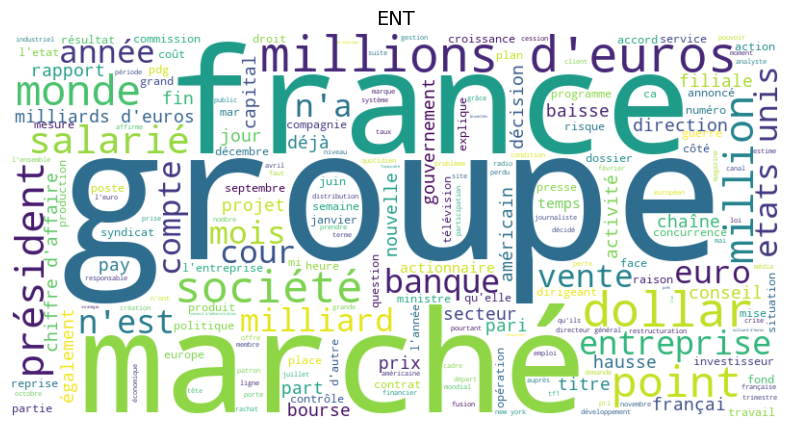

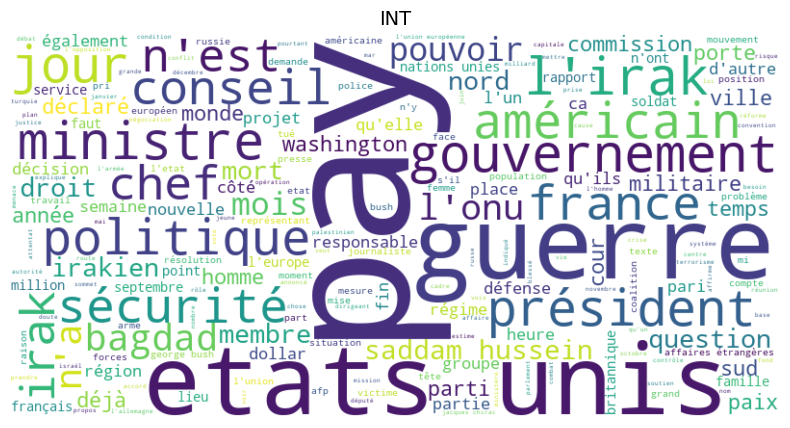

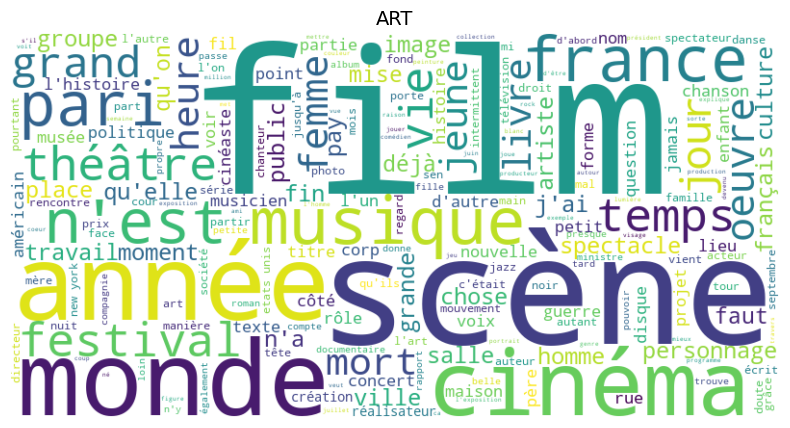

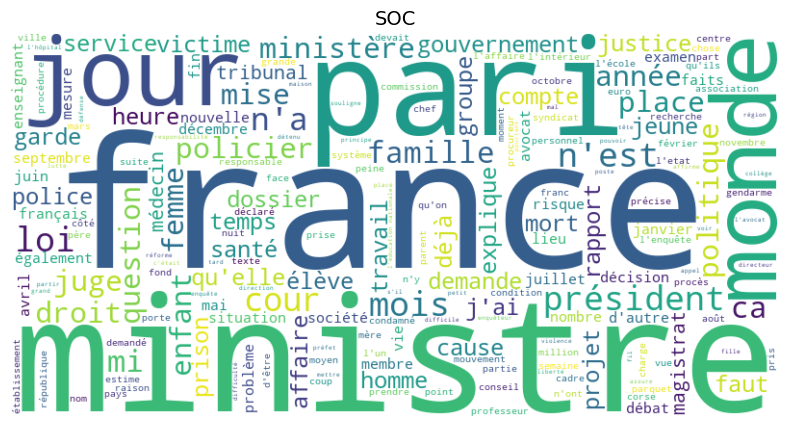

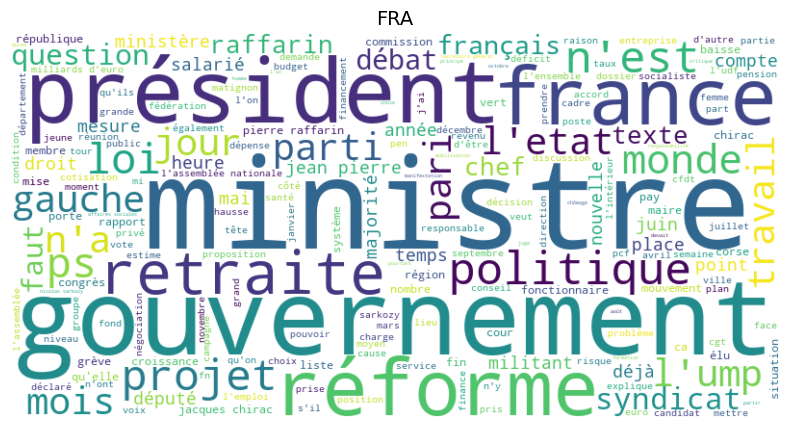

In [5]:
from wordcloud import WordCloud
# Display one wordcloud for each of the most frequent classes

STOPWORDS = [x.strip() for x in open('data/stop_word_fr.txt').readlines()]
import matplotlib.pyplot as plt

# plot a word cloud for each category
for cat in ['ENT', 'INT',  'ART', 'SOC', 'FRA']:
    # a) Filtrer les articles de la catégorie
    text_join = " ".join(data[data["category"] == cat]["text"])

    # b) Générer le nuage de mots
    wordcloud = WordCloud(
        width=800, height=400,
        background_color="white",
        stopwords=STOPWORDS
    ).generate(text_join)

    # c) Afficher le nuage dans un sous-graphique
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(cat, fontsize=14) 
    plt.show()

 # YOUR CODE HERE

## Bag-of-word representation

In order to apply machine learning algorithms to text, documents must be transformed into vectors. The most simple and standard way to transform a document into a vector is the *bag-of-word* encoding.

The idea is very simple : 

1. define the set of all the possible words that can appear in a document; denote its size by `max_features`.
2. for each document,  encode it with a vector of size `max_features`, with the value of the ith component of the vector equal to the number of time the ith word appears in the document.

See [the wikipedia article on Bag-of-word](https://en.wikipedia.org/wiki/Bag-of-words_model) for an example.

Scikit-learn proposes different methods to encode text into vectors : [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and [TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html).

The encoder must first be trained on the train set and applied to the different sets, for example with the 200  words : 

	from sklearn.feature_extraction.text import CountVectorizer
	vectorizer = CountVectorizer(max_features=200)
    vectorizer.fit(X_train)
    X_train_counts = vectorizer.transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
        
**Question**:

> * Split the dataset LeMonde2003 into train set (80%), dev set (10%)  and test set (10%) using scikit-learn [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
> * For each set, transform the text of the articles into vectors using the `CountVectorizer`, considering the 1000 most frequent words. 
> * Train a naive bayes classifier on the data. 
> * Evaluate the classification accuracy on the train, dev and test sets using the [score](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.score) method. 

> ***Important*** : the test set must not be used during the training phase, and learning the vector representation of the words is part of the training. The dev set should be an evaluation of the test set.



In [6]:
%pip install numpy==1.26.4

Note: you may need to restart the kernel to use updated packages.


In [7]:
from sklearn.model_selection import train_test_split
# Split the dataset, create X (features) and y (target), print the size
# YOUR CODE HERE

X = data['text']
y = data['category']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
# Create document vectors
# YOUR CODE HERE
# create the vectorizer object
vectorizer = CountVectorizer(max_features=200)

# fit on train data
vectorizer.fit(X_train)

# apply it on train and dev data
X_train_counts = vectorizer.transform(X_train)
X_dev_counts = vectorizer.transform(X_dev)
X_test_counts = vectorizer.transform(X_test)

In [9]:
from sklearn.naive_bayes import MultinomialNB

# train a Naive Bayes classifier
# YOUR CODE HERE
# create the MultinomialNB
clf = MultinomialNB()
# Train 
clf.fit(X_train_counts, y_train)

# Evaluate 
clf.score(X_dev_counts, y_dev)

0.5417771883289124

## TF-IDF representation

The `CountVectorizer` encodes the text using the raw frequencies of the words. However, words that are very frequent and appear in all the documents will have a strong weight whereas they are not discriminative. The *Term-Frequency Inverse-Document-Frequency* weighting scheme take into accound the number of documents in which a given word occurs. A word that appear in many document will have less weight. See [the wikipedia page](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) for more details.

With scikit-learn, the `TfidfTransformer` is applied after the `CountVectorizer` :

	from sklearn.feature_extraction.text import TfidfTransformer
	tf_transformer = TfidfTransformer().fit(X_train_counts)
 	X_train_tf = tf_transformer.transform(X_train_counts)
	X_test_tf = tf_transformer.transform(X_test_counts)
	
**Question**:

> * Use the TF-IDF representation to train a Multinomial Naive Bayes classifier. Report your best test error rate and the error rates for all the configurations tested.

In [10]:
from sklearn.feature_extraction.text import TfidfTransformer
# YOUR CODE HERE

tf_transformer = TfidfTransformer().fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_test_tf = tf_transformer.transform(X_test_counts)
X_dev_tf = tf_transformer.transform(X_dev_counts)

multimodel = MultinomialNB()

multimodel.fit(X_train_tf, y_train)

multimodel.score(X_test_tf, y_test)

0.5084521047398077

## Error analysis

The classification error rate give an evaluation of the performance for all the classes. But since the classes are not equally distributed, they may not be equally well modelized. In order to get a better idea of the performance of the classifier, detailed metrics must be used : 

* [metrics.classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) provides a detailed analysis per class : the precision (amongst all the example classified as class X, how many are really from the classX) and the recall (amongst all the example that are from the class X, how many are classified as class X) and the F-Score which is as a weighted harmonic mean of the precision and recall.
* [metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) which give the confusions between the classes. It can be displayed in color with [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix).

**Question**:

> * Report the `classification_report` for your  classifier. Which classes have the best scores ? Why ?
> * Report the `confusion_matrix` for your  classifier. Which classes are the most confused ? Why ?


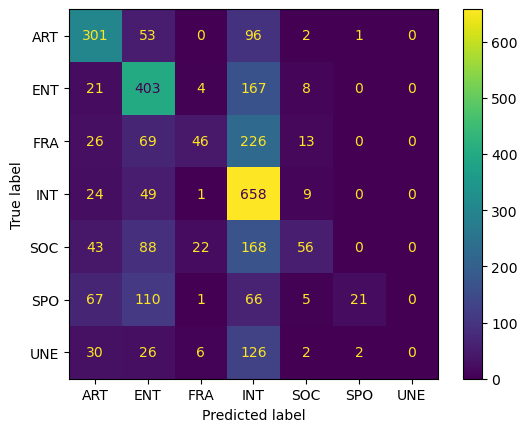

In [11]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(
    multimodel,
    X_dev_tf,
    y_dev,
)


## Data re-configuration
After the error analysis, we came to the conclusion that one of the class can not be distinguised from the others. There is no use trying to solve an impossible problem.

**Questions**:

> * Remove the class `UNE` from the original dataset and merge the semantically close classes 'FRANCE' and 'SOCIETE'
> * Plot the class statitics with seaborn
> * Create new splits
> * Retrain a NaiveBayes classifier using [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) with the 1000 most frequent words.

train size (22488, 2)
dev size (2811, 2)
test size (2811, 2)
Accuracy: 0.5385983635716827
F1 Score: 0.5945253576120362


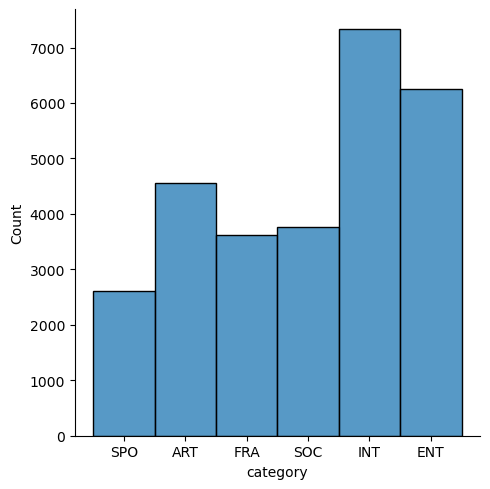

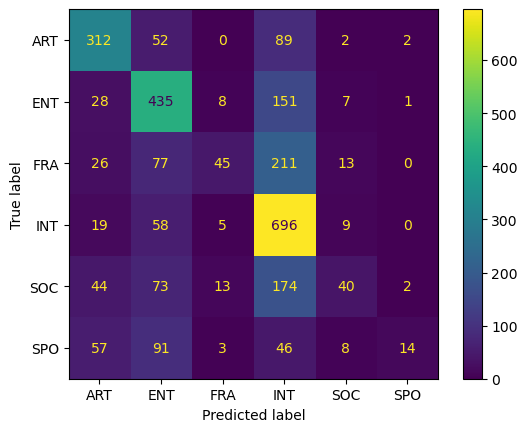

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
# YOUR CODE HERE

# Filter out the UNE class
data2 = data.loc[data.category != "UNE"]

# Plot the statistics of classes
sns.displot(data2, x="category")

# Make the splits and print the sizes for checking
data2_train, data2_dev_test = train_test_split(data2.dropna() ,test_size=0.20, random_state=42)
data2_dev, data2_test = train_test_split(data2_dev_test ,test_size=0.5, random_state=42)

print ('train size',data2_train.shape)
print ('dev size', data2_dev.shape)
print ('test size', data2_test.shape)

X_train2 = data2_train.text
X_dev2 = data2_dev.text
X_test2 = data2_test.text
y_train2 = data2_train.category
y_dev2 = data2_dev.category
y_test2 = data2_test.category

# Apply TfidfVectorizer
X_train_counts2 = vectorizer.transform(X_train2)
X_dev_counts2 = vectorizer.transform(X_dev2)
X_test_counts2 = vectorizer.transform(X_test2)
tf_transformer2 = TfidfTransformer().fit(X_train_counts2)
X_train_tf2 = tf_transformer.transform(X_train_counts2)
X_test_tf2 = tf_transformer.transform(X_test_counts2)
X_dev_tf2 = tf_transformer.transform(X_dev_counts2)

# Train MultinomialNB

model2 = MultinomialNB()
model2.fit(X_train_tf2, y_train2)

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

# Print accuracy
y_pred2 = model2.predict(X_test_tf2)
accuracy2 = accuracy_score(y_pred2, y_test2)
f12 = f1_score(y_pred2, y_test2, average="weighted")

print("Accuracy:", accuracy2)
print("F1 Score:", f12)

# Print confusion matric
disp = ConfusionMatrixDisplay.from_estimator(
    model2,
    X_dev_tf2,
    y_dev2,
)

## What about the LLMs?

**You must write the answer to this question in a notebook hosted in your github account and give access to your supervisor.**

LLMs are reputed to have revolutionised automatic language processing. Since the introduction of BERT-type models, all language processing applications have been based on LLMs, of varying degrees of sophistication and size. These models are trained on multiple tasks and are therefore capable of performing new tasks without learning, simply from a prompt. This is known as "zero-shot learning" because there is no learning phase as such. We are going to test these models on our classification task.

Huggingface is a Franco-American company that develops tools for building applications based on Deep Learning. In particular, it hosts the huggingface.co portal, which contains numerous Deep Learning models. These models can be used very easily thanks to the [Transformer] library (https://huggingface.co/docs/transformers/quicktour) developed by HuggingFace.

Using a transform model in zero-shot learning with HuggingFace is very simple: [see documentation](https://huggingface.co/tasks/zero-shot-classification)

However, you need to choose a suitable model from the list of models compatible with Zero-Shot classification. HuggingFace offers [numerous models](https://huggingface.co/models?pipeline_tag=zero-shot-classification). 

The classes proposed to the model must also provide sufficient semantic information for the model to understand them.

**Question**:

* Write a code to classify an example of text from an article in Le Monde using a model transformed using zero-sot learning with the HuggingFace library.
* choose a model and explain your choice
* choose a formulation for the classes to be predicted
* show that the model predicts a class for the text of the article (correct or incorrect, analyse the results)
* evaluate the performance of your model on 100 articles (a test set).
* note model sizes, processing times and classification results


Notes :
* make sure that you use the correct Tokenizer when using a model 
* start testing with a small number of articles and the first 100's of characters for faster experiments.